In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale 

In [20]:
order_df = pd.read_csv("C:/Users/Hp/Desktop/dataware house dataset/order/car_order.csv")

In [21]:
order_df

,ID,transactionID,date,dollar_sell,paymentID,customerID,productID,rate
0,1,3,1/1/2018,40000,2,625,911,3
1,2,4,1/1/2018,100000,1,937,463,1
2,3,5,1/1/2018,70000,3,793,321,1
3,4,6,1/1/2018,40000,1,274,273,3
4,5,7,1/1/2018,40000,1,523,845,5
...,...,...,...,...,...,...,...,...
1995,1996,4684,12/27/2019,70000,2,59,505,3
1996,1997,4685,12/27/2019,90000,2,255,191,2
1997,1998,4688,12/28/2019,70000,1,351,733,3
1998,1999,4692,12/30/2019,100000,1,936,669,1


In [22]:
df = order_df.iloc[:, 5:8]
df

,customerID,productID,rate
0,625,911,3
1,937,463,1
2,793,321,1
3,274,273,3
4,523,845,5
...,...,...,...
1995,59,505,3
1996,255,191,2
1997,351,733,3
1998,936,669,1


In [23]:
df.customerID.value_counts()

581    8
634    8
863    7
123    7
268    7
      ..
797    1
798    1
801    1
219    1
1      1
Name: customerID, Length: 866, dtype: int64

In [24]:
df.productID.value_counts()

505    8
977    8
318    8
587    7
720    7
      ..
467    1
138    1
468    1
141    1
311    1
Name: productID, Length: 865, dtype: int64

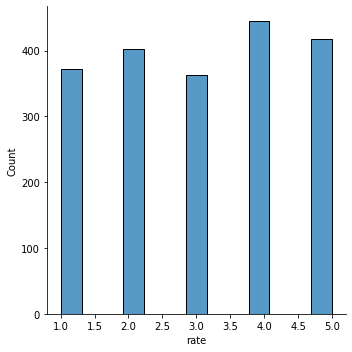

In [25]:
sns.displot(data=df, x="rate")

In [26]:
from scipy.sparse import csr_matrix
pivot = df.reset_index().pivot_table(index="productID", columns="customerID", values="rate").fillna(0)
# matrix = csr_matrix(pivot.values)
# matrix
# rating_with_ratingCount = rating_with_ratingCount.drop_duplicates(["User-ID",'Book-Title'])
len(pivot.columns.unique())

866

In [27]:
pivot.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = "cosine", algorithm="brute")
# model_knn.fit(matrix)
model_knn.fit(pivot.values)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
pivot.iloc[0, :].values.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [30]:
distances, indices = model_knn.kneighbors(pivot.iloc[3, :].values.reshape(1,-1), n_neighbors = 6)
distances.flatten()

array([1.11022302e-16, 3.82786600e-01, 3.82786600e-01, 5.63564220e-01,
       5.94779551e-01, 6.43651677e-01])

In [36]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for car with productID is {0}:\n'.format(pivot.index[3]))
        print("With knn = 6, we have:")
    else:
        print('productID: {}, with distance of {}:'.format(pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for car with productID is 6:

With knn = 6, we have:
productID: 527, with distance of 0.38278660015163235:
productID: 465, with distance of 0.38278660015163235:
productID: 209, with distance of 0.5635642195280153:
productID: 356, with distance of 0.5947795507634461:
productID: 790, with distance of 0.6436516774501009:


In [3]:
import textblob
import spacy

In [2]:
import scipy

In [ ]:
impor